# Task 1: Data Preprocessing & Exploration

#### Our goal is to prepare and understand the given dataset to build a solid foundation for the model


### 0 Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

# Plotting settings
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)

print("Libraries imported successfully!")
print(f"Random seed set to: {RANDOM_SEED}")

Matplotlib is building the font cache; this may take a moment.


Libraries imported successfully!
Random seed set to: 42


In [3]:
df = pd.read_csv('../data/raw/diabetes_dataset.csv')
print(df.shape)
print(df.columns) # Display column names (our features)
print(df.dtypes)
df.head(10) # Display first 10 records

(100000, 31)
Index(['age', 'gender', 'ethnicity', 'education_level', 'income_level',
       'employment_status', 'smoking_status', 'alcohol_consumption_per_week',
       'physical_activity_minutes_per_week', 'diet_score',
       'sleep_hours_per_day', 'screen_time_hours_per_day',
       'family_history_diabetes', 'hypertension_history',
       'cardiovascular_history', 'bmi', 'waist_to_hip_ratio', 'systolic_bp',
       'diastolic_bp', 'heart_rate', 'cholesterol_total', 'hdl_cholesterol',
       'ldl_cholesterol', 'triglycerides', 'glucose_fasting',
       'glucose_postprandial', 'insulin_level', 'hba1c', 'diabetes_risk_score',
       'diabetes_stage', 'diagnosed_diabetes'],
      dtype='object')
age                                     int64
gender                                 object
ethnicity                              object
education_level                        object
income_level                           object
employment_status                      object
smoking_status     

,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,...,41,160,145,136,236,6.36,8.18,29.6,Type 2,1
1,48,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,...,55,50,30,93,150,2.00,5.63,23.0,No Diabetes,0
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,...,66,99,36,118,195,5.07,7.51,44.7,Type 2,1
3,74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,...,50,79,140,139,253,5.28,9.03,38.2,Type 2,1
4,46,Male,White,Graduate,Middle,Retired,Never,1,109,7.2,...,52,125,160,137,184,12.74,7.20,23.5,Type 2,1
5,46,Female,White,Highschool,Upper-Middle,Employed,Never,2,124,9.0,...,61,119,179,100,133,8.77,6.03,23.5,Pre-Diabetes,0
6,75,Female,White,Graduate,Upper-Middle,Retired,Never,0,53,9.2,...,46,161,155,101,100,10.14,5.24,36.1,Pre-Diabetes,0
7,62,Male,White,Postgraduate,Middle,Unemployed,Current,1,75,4.1,...,49,159,120,110,189,8.96,7.04,34.2,Type 2,1
8,42,Male,Black,Highschool,Lower-Middle,Employed,Current,1,114,6.7,...,33,132,98,116,172,5.70,6.90,26.7,Type 2,1
9,59,Female,White,Graduate,Middle,Employed,Current,3,86,8.2,...,52,103,104,76,109,4.49,4.99,30.0,No Diabetes,0


### 1.1 Cleaning Process

Start by first displaying the dataset before any changes are applied to it. Our provided [dataset](https://www.kaggle.com/datasets/mohankrishnathalla/diabetes-health-indicators-dataset/data) is already preprocessed, clean, and ready for models to start working with. However, we will still go through with cleaning process if we plan to add anymore future datasets. There is only one issue, specifically, the feature *diabetes_stages* is unneeded for our prediction model and basically gives away the answer.





In [4]:
print("Dataset before cleaning:")
for column in df.columns:
    if np.issubdtype(df[column].dtype, np.number):
        print(f"{column:<40} Mean: {df[column].mean():>8.3f} | Median: {df[column].median():>8.3f}")

Dataset before cleaning:
age                                      Mean:   50.120 | Median:   50.000
alcohol_consumption_per_week             Mean:    2.004 | Median:    2.000
physical_activity_minutes_per_week       Mean:  118.912 | Median:  100.000
diet_score                               Mean:    5.995 | Median:    6.000
sleep_hours_per_day                      Mean:    6.998 | Median:    7.000
screen_time_hours_per_day                Mean:    5.996 | Median:    6.000
family_history_diabetes                  Mean:    0.219 | Median:    0.000
hypertension_history                     Mean:    0.251 | Median:    0.000
cardiovascular_history                   Mean:    0.079 | Median:    0.000
bmi                                      Mean:   25.613 | Median:   25.600
waist_to_hip_ratio                       Mean:    0.856 | Median:    0.860
systolic_bp                              Mean:  115.800 | Median:  116.000
diastolic_bp                             Mean:   75.232 | Median:   75.000


In [5]:
# Handling Null Values (empty records)
df_null = df.isnull() # bool
total_null = df_null.sum().sum() # count

print(f"Total Before:   {total_null} null") # Summing up null values for each column before handling
print(df.shape)

df_cleaned = df.copy()

# Handling Outliers
exclude_columns = ['family_history_diabetes','hypertension_history','cardiovascular_history','diagnosed_diabetes'] # Categorical columns to exclude (These are True/False binary values)
for col in exclude_columns:
    df_cleaned[col] = df_cleaned[col].clip(0,1) # reassigns any outliers to the closest bounds (0 or 1)

allowed_columns = df_cleaned.select_dtypes(include=[np.number]).columns.difference(exclude_columns) # columns to check for outliers

# Using IQR https://www.kaggle.com/code/aman2626786/outlier-removal-using-iqr-method
# This removes around 16k records from original 100k records
for col in allowed_columns:
    p25 = df_cleaned[col].quantile(0.25)
    p75 = df_cleaned[col].quantile(0.75)
    iqr = p75 - p25
    lower_bound = p25 - 1.5 * iqr
    upper_bound = p75 + 1.5 * iqr
    df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)] # Remove outliers

# Handling duplicate and empty records
df_cleaned = df_cleaned.drop_duplicates().dropna().drop('diabetes_stage', axis=1) # Drop duplicates, empty records, and 'diabetes_stage' column


for column in df_cleaned.columns:
    if df_cleaned[column].isnull().sum() > 0: # Check column datatypes if there exists null values
        if df_cleaned[column].dtype in [np.float64, np.int64]: # Numerical variables
            print(f"{column} contains {df_cleaned[column].isnull().sum()} null values.")
            df_cleaned[column] = df_cleaned[column].fillna(df_cleaned[column].median())
        else:
            df_cleaned[column] = df_cleaned[column].fillna("UNKNOWN") # Categorical variables

cleandf_null = df_cleaned.isnull() # bool

print(f"Total After:    {cleandf_null.sum().sum()} null") # Summing up null values for each column
print(df_cleaned.shape)

Total Before:   0 null
(100000, 31)
Total After:    0 null
(88637, 30)


In [6]:
print("Dataset after cleaning:")
for column in df_cleaned.columns:
    if np.issubdtype(df_cleaned[column].dtype, np.number):
        print(f"{column:<40} Mean: {df_cleaned[column].mean():>8.3f} | Median: {df_cleaned[column].median():>8.3f}")

Dataset after cleaning:
age                                      Mean:   49.764 | Median:   50.000
alcohol_consumption_per_week             Mean:    1.979 | Median:    2.000
physical_activity_minutes_per_week       Mean:  110.947 | Median:   97.000
diet_score                               Mean:    6.026 | Median:    6.000
sleep_hours_per_day                      Mean:    7.000 | Median:    7.000
screen_time_hours_per_day                Mean:    5.966 | Median:    6.000
family_history_diabetes                  Mean:    0.211 | Median:    0.000
hypertension_history                     Mean:    0.249 | Median:    0.000
cardiovascular_history                   Mean:    0.078 | Median:    0.000
bmi                                      Mean:   25.563 | Median:   25.600
waist_to_hip_ratio                       Mean:    0.856 | Median:    0.860
systolic_bp                              Mean:  115.484 | Median:  115.000
diastolic_bp                             Mean:   75.194 | Median:   75.000
h

### 1.2 Encoding 

To allow our dataset to become understandable to machine learning algorithms, we must encode the categorical objects in our dataset. Categorical variables/objects are often data types that these algorithms cannot understand (e.g., strings, descriptive information), there are two different types that exist: *Ordinal* and *Nominal*.

**Ordinal Data** - 
    Can be described as values that contain an "order" or a "hierarchy". For example, we can see this for feature *education_level*, as we grown up experiencing this as we progressed from all elementary school to university.

**Nominal Data** - 
    Can be decsribed as values that contain no order. For example, we see this with feature *gender*, where the options are Man or Female and there is no order between the two.
    
Encoding properly is vital as to our prediction model stripping away bias and relationships, while also providing additional information. There are several approaches to do this, however we decided to select: *One Hot Encoding* and *Ordinal Encoding*:

| Column Name         | Data Type | Categorical Type | Encoding Approach
|----------------------|------------|------------|------------|
| gender               | object     | nominal  | one hot encoding
| ethnicity            | object     | nominal  | one hot encoding
| education_level      | object     | ordinal  | ordinal encoding
| income_level         | object     | ordinal  | ordinal encoding
| employment_status    | object     | nominal  | one hot encoding
| smoking_status       | object     | ordinal  | ordinal encoding


In [7]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

nominal_columns = ['gender', 'ethnicity', 'employment_status']
ordinal_columns = ['education_level', 'income_level', 'smoking_status']
ordinal_categories = [
    ['No formal', 'Highschool', 'Graduate', 'Postgraduate'],  # education_level
    ['Low', 'Lower-Middle', 'Middle', 'Upper-Middle', 'High'],  # income_level
    ['Never', 'Former', 'Current']  # smoking_status
]

# One Hot Encoding
df_feature = df_cleaned.copy()
df_feature = pd.get_dummies(df_feature, columns=nominal_columns,drop_first=True,dtype=int)

# Ordinal Encoding
encoder = OrdinalEncoder(categories=ordinal_categories)
df_feature[ordinal_columns] = encoder.fit_transform(df_feature[ordinal_columns])

#df_feature will be used on forward instead of df_clean btw


### 1.3 Exploratory Data Analysis
binning
 -- age 
 -- white vs minorities
 -- educated vs uneducated (high school degree vs higher education)
 -- smoked vs never smoked
 -- alc vs no alc
ratios
differences

MULTICOLLINEARITY

notes:
     main indicators - loss in weight and high blood sugar
                     - high bmi
                     - physical and shit diet
                     -  low education w/ low income
                     - type 2 


In [8]:
# Correlation between features and diabetes_diagnosis
strong_corr = {} # save positive values here
inv_strong_corr = {} # save negative values here
# We can setup more bins in the feature for future datasets

features = df_feature.columns.difference(['diagnosed_diabetes']) # features to compare to
for col in features: 
    corr_val = df_feature[col].corr(df_feature['diagnosed_diabetes'])
    if  corr_val > 0.3: # parse for moderate / strong correlation
        strong_corr[col] = corr_val
        print(f"{col}: {corr_val}")

    elif corr_val < -0.3: # inverse
        strong_corr[col] = corr_val
        print(f"{col}: {corr_val}")

# print(df_feature['physical_activity_minutes_per_week'].corr(df_feature['diagnosed_diabetes'])) # just checking this specific feature


# AGE DISTRIBUTION BY DIABETES STATUS
# Create age bins and labels
age_bins = [0, 20, 30, 40, 50, 60, 100]
age_labels = ['≤20', '21-30', '31-40', '41-50', '51-60', '60+']

# Initialize counters
age_no_diabetes = [0, 0, 0, 0, 0, 0]
age_diabetes = [0, 0, 0, 0, 0, 0]

# Count by age group and diabetes status
for index, row in df_feature.iterrows():
    age = row['age']
    diabetes_diagnosis = row['diabetes_diagnosis']

    # Bin age
    if age <= 20:
        age_group = 0
    elif age <= 30:
        age_group = 1
    elif age <= 40:
        age_group = 2
    elif age <= 50:
        age_group = 3
    elif age <= 60:
        age_group = 4
    else:
        age_group = 5

    if diabetes_diagnosis == 1:
        age_diabetes[age_group] += 1
    else:
        age_no_diabetes[age_group] += 1

        # TODO: Plot Bar Graph

# Education vs No Education
    



# Income Level

# Smoking Status

# Family History

# bmi glucose hba1c histograms





glucose_fasting: 0.5034013313582199
glucose_postprandial: 0.6322056815334999
hba1c: 0.6852483157607602


KeyError: 'diabetes_diagnosis'

# Task 2: Model Development and Optimization 
### In Task 2 our goal is build, train and optimize all the models we will use in the project.

In [9]:
# === Task 2 — Step 0: Train/Test Split + Scaling ===

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    roc_auc_score,
    confusion_matrix,
    classification_report
)

# Ensure df_feature exists
print("Dataset shape:", df_feature.shape)

target_col = "diagnosed_diabetes"

# Features and target
X = df_feature.drop(columns=[target_col])
y = df_feature[target_col]

print("Target distribution:")
print(y.value_counts())

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("\nTrain shape:", X_train.shape)
print("Test shape:", X_test.shape)

# Scaling for Logistic Regression (not for tree models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nScaling complete.")

Dataset shape: (88637, 36)
Target distribution:
diagnosed_diabetes
1    53208
0    35429
Name: count, dtype: int64

Train shape: (70909, 35)
Test shape: (17728, 35)

Scaling complete.


In [10]:
# === Baseline Model 1: Logistic Regression ===

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(
    max_iter=1000,
    class_weight="balanced",
    solver="lbfgs"
)

# Train on scaled features
log_reg.fit(X_train_scaled, y_train)

# Predictions on test set
y_pred_lr = log_reg.predict(X_test_scaled)
y_proba_lr = log_reg.predict_proba(X_test_scaled)[:, 1]

print("=== Logistic Regression Results ===")
print("Accuracy: ", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:   ", recall_score(y_test, y_pred_lr))
print("ROC-AUC:  ", roc_auc_score(y_test, y_proba_lr))

print("\nClassification report:\n", classification_report(y_test, y_pred_lr))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_lr))

=== Logistic Regression Results ===
Accuracy:  0.8870712996389891
Precision: 0.9285714285714286
Recall:    0.8795339221950761
ROC-AUC:   0.9360039195211323

Classification report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      7086
           1       0.93      0.88      0.90     10642

    accuracy                           0.89     17728
   macro avg       0.88      0.89      0.88     17728
weighted avg       0.89      0.89      0.89     17728

Confusion matrix:
 [[6366  720]
 [1282 9360]]


In [11]:
# === Baseline Model 2: Random Forest ===

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight="balanced_subsample",
    n_jobs=-1
)

# Train on unscaled features
rf.fit(X_train, y_train)

# Predictions on test set
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

print("=== Random Forest Results ===")
print("Accuracy: ", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:   ", recall_score(y_test, y_pred_rf))
print("ROC-AUC:  ", roc_auc_score(y_test, y_proba_rf))

print("\nClassification report:\n", classification_report(y_test, y_pred_rf))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_rf))

=== Random Forest Results ===
Accuracy:  0.9220442238267148
Precision: 0.9991375592927986
Recall:    0.870888930652133
ROC-AUC:   0.94616432273553

Classification report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      7086
           1       1.00      0.87      0.93     10642

    accuracy                           0.92     17728
   macro avg       0.92      0.93      0.92     17728
weighted avg       0.93      0.92      0.92     17728

Confusion matrix:
 [[7078    8]
 [1374 9268]]


In [12]:
# === Comparison of Baselines ===

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight="balanced_subsample",
    n_jobs=-1
)

# Train on unscaled features
rf.fit(X_train, y_train)

# Predictions on test set
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

print("=== Random Forest Results ===")
print("Accuracy: ", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:   ", recall_score(y_test, y_pred_rf))
print("ROC-AUC:  ", roc_auc_score(y_test, y_proba_rf))

print("\nClassification report:\n", classification_report(y_test, y_pred_rf))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_rf))


=== Random Forest Results ===
Accuracy:  0.9220442238267148
Precision: 0.9991375592927986
Recall:    0.870888930652133
ROC-AUC:   0.94616432273553

Classification report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      7086
           1       1.00      0.87      0.93     10642

    accuracy                           0.92     17728
   macro avg       0.92      0.93      0.92     17728
weighted avg       0.93      0.92      0.92     17728

Confusion matrix:
 [[7078    8]
 [1374 9268]]


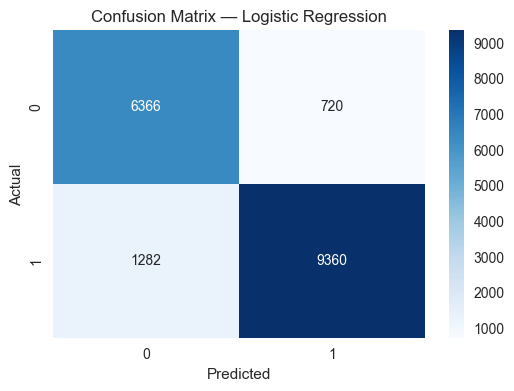

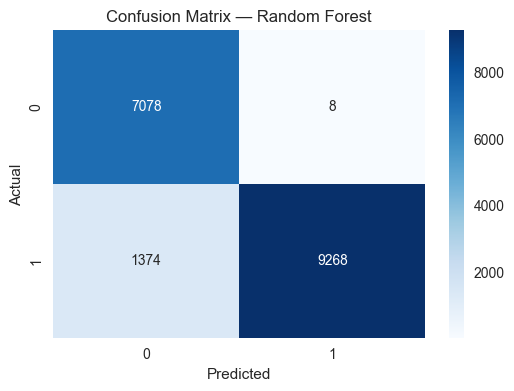

In [ ]:
#HEATMAP GENERATIONS for Logistic Regression Baseline and Random Forrest Baseline

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Function to plot confusion matrix heatmaps
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Logistic Regression confusion matrix
plot_confusion_matrix(y_test, y_pred_lr, "Confusion Matrix — Logistic Regression")

# Random Forest confusion matrix
plot_confusion_matrix(y_test, y_pred_rf, "Confusion Matrix — Random Forest")

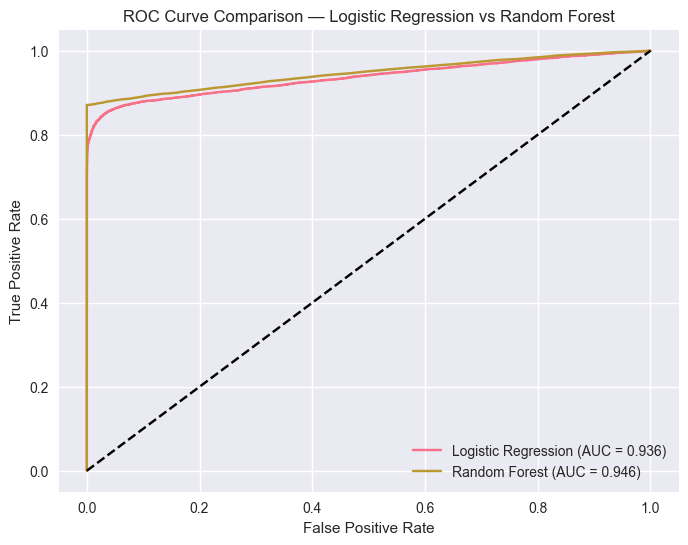

In [15]:
# ROC Curves for Logistic Regression vs Random Forest

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)

plt.figure(figsize=(8,6))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {roc_auc_score(y_test, y_proba_lr):.3f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_score(y_test, y_proba_rf):.3f})")

plt.plot([0,1], [0,1], 'k--')  # diagonal baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison — Logistic Regression vs Random Forest")
plt.legend()
plt.grid(True)
plt.show()

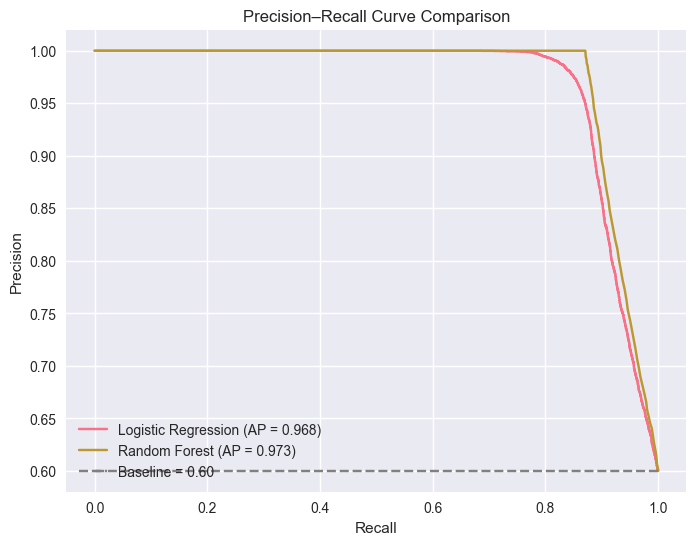

In [16]:
# === Precision-Recall Curve Comparison (Logistic Regression vs Random Forest) ===

from sklearn.metrics import precision_recall_curve, average_precision_score

# Logistic Regression PR values
precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_proba_lr)
ap_lr = average_precision_score(y_test, y_proba_lr)

# Random Forest PR values
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_proba_rf)
ap_rf = average_precision_score(y_test, y_proba_rf)

plt.figure(figsize=(8,6))

# Plot curves
plt.plot(recall_lr, precision_lr, label=f"Logistic Regression (AP = {ap_lr:.3f})")
plt.plot(recall_rf, precision_rf, label=f"Random Forest (AP = {ap_rf:.3f})")

# Baseline (mean positives)
baseline = y_test.mean()
plt.hlines(baseline, 0, 1, colors='gray', linestyles='--', label=f"Baseline = {baseline:.2f}")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve Comparison")
plt.legend()
plt.grid(True)
plt.show()

/var/folders/sx/db6668210fn6k_3z7q1b0pvm0000gn/T/ipykernel_23949/1548640500.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=rf_importance_df.head(20), palette='viridis')


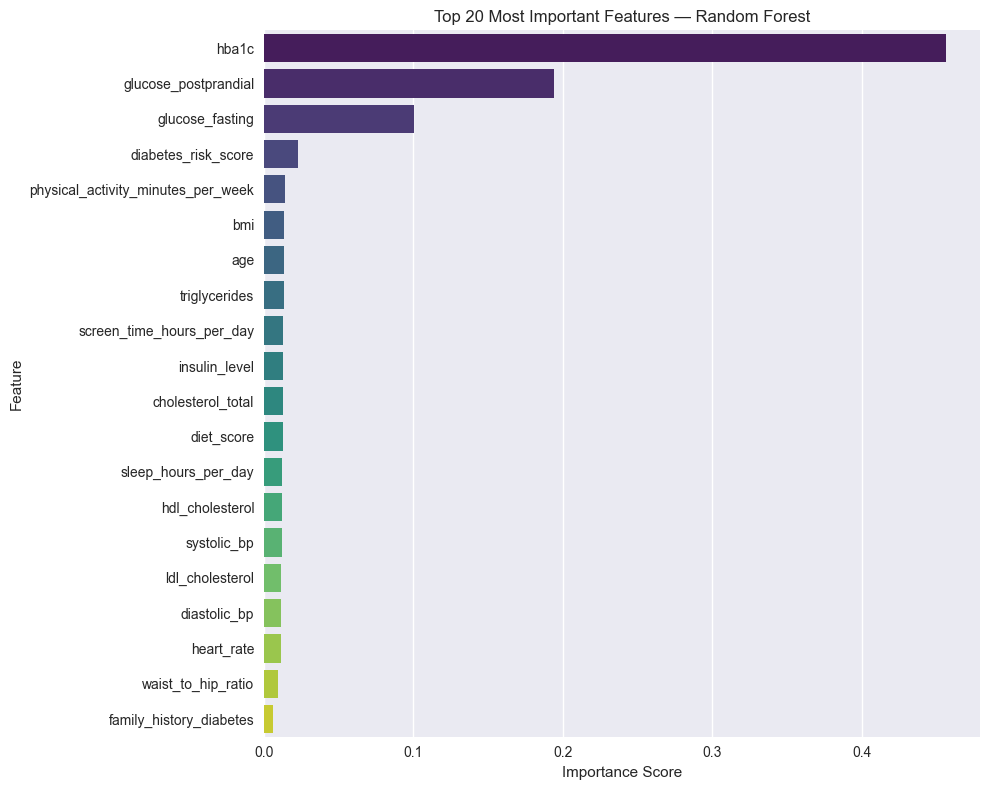

In [17]:
# === Random Forest Feature Importance ===

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature names
feature_names = X_train.columns

# Get importances
importances = rf.feature_importances_

# Combine into a dataframe
rf_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=rf_importance_df.head(20), palette='viridis')
plt.title("Top 20 Most Important Features — Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

/var/folders/sx/db6668210fn6k_3z7q1b0pvm0000gn/T/ipykernel_23949/3669573923.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=lr_importance_df.head(20), palette='magma')


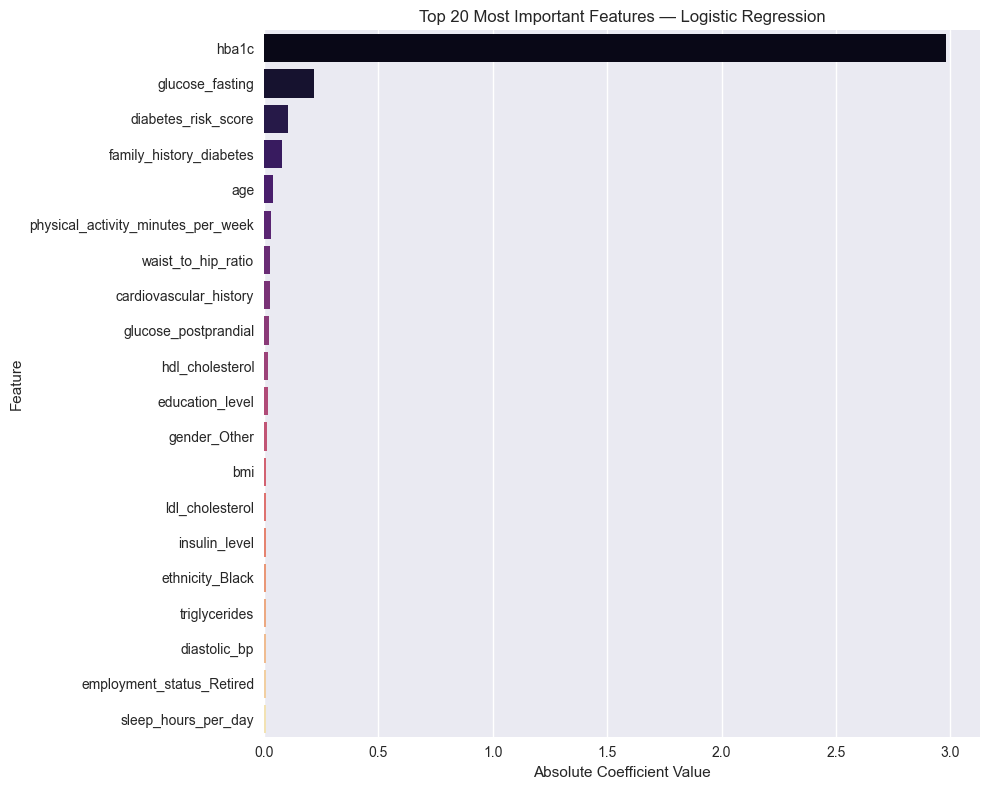

In [18]:
# === Logistic Regression Coefficient Importance ===

import numpy as np

coef = log_reg.coef_[0]  # logistic regression coefficients

lr_importance_df = pd.DataFrame({
    'feature': feature_names,
    'coef': coef,
    'importance': np.abs(coef)
}).sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=lr_importance_df.head(20), palette='magma')
plt.title("Top 20 Most Important Features — Logistic Regression")
plt.xlabel("Absolute Coefficient Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()
